#**Project 3: Storytelling with Code and Data.**

## Section 1: Introduction.

The objective of this project is to provide a data-driven interpretation of the pupil-participant-student dataset made available by the Central Bureau of Statistics (CBS). This dataset provides frequencies for the number of pupils, participants, and students which are either enrolled in secondary education, secondary vocational education, adult education, or higher education at the 1st of October for a particular school-/study year over the 2000-2020 period in the Netherlands. These frequencies have additionally been stratified by education type, education level, migration background, age, sex, and region. The dataset can be obtained <a href="https://opendata.cbs.nl/portal.html?_la=nl&_catalog=CBS&tableId=71450ned&_theme=333%2F">here</a>. Please note that all the analysis in the upcoming sections use data which are a subset of the complete CBS dataset, but that they vary in the types of variables that are used or how these variables are operationalized. Such differences will be commented on when necessary. 



## Section 2: Loading data and dependencies.

In [ ]:
# Setting up the google colab environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/project3

/content/drive/MyDrive/project3


In [ ]:
# Installing packages and other dependencies (if needed)
# Library for performing correspondence analysis (PCA for categorical variables)
!pip install prince
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirement
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

In [ ]:
# Import packages and dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np
import prince 
import re

In [ ]:
# Loading the dataframes. 
from preprocessing import dataprocess_jw, dataprocess, dataprocess_gdf_prov, process_population
# Dataframe first analysis.
df_jw = dataprocess_jw()
# Dataframe second analysis.
df = dataprocess()
# Dataframe third analysis.
gdf_prov = dataprocess_gdf_prov()
# Dataframe fourth analysis.
merged_data = process_population()


## Section 3: Analyzing the CBS data.

This section consists of four analyses. The first asks whether educational opportunity is equally distributed amongst all citizens of the Dutch population, specifically by sex and migration background. It additionally seeks to identify how education type has developed between these different categories over time. The second analysis uses a correspondence analysis to investigate in which provinces students are relatively on average more practically/profession oriented and in which provinces students are relatively more theoretically/academically oriented. In the third and fourth analyses, the dataset is visualized by means of geovisualization to investigate the educational distribution stratified by Dutch provinces, and the link between average income and population density. 

### Section 3.1: Investigating educational opportunity by sex and migration background

According to its website, the objective of the national statistical office, or Statistics Netherlands (CBS), is to "provide reliable statistical information and data to produce insight into social issues, thus supporting the public debate, policy development and decision-making while contributing to prosperity, well-being and democracy" (CBS, 2021). Based on this objective, let us imagine a scenario where the CBS has been tasked to produce insight into how educational opportunities are distributed amongst the Dutch population. More specifically, it has been asked to provide insight into whether educational opportunity is equally distributed amongst all citizens of the Dutch population. The relevance of this issue is illustrated by the fact that Dutch women experienced significant barriers with respect to entry to higher education before the 1970's (Traag, 2020), where in the contemporaneous context ethnic minorities have faced similar such barriers (NJI, 2019). The main question would consequently be whether such barriers still exist today, and if so, whether their severity has increased or decreased over the last decades.  

In order to provide such insight, a researcher at CBS could proceed by asking two types of questions. The first relates to providing insight into the current cross-sectional distribution of education type by sex and migration background. The second relates to how it has progressed over time, i.e., whether disparities in educational opportunity on the basis of sex and migration background have improved or worsened. This could then result in the following question set: 
- How is education type distributed amongst men and women in the Netherlands in the 2019-2020 period? 
- How has the distribution of education type amongst men and women in the Netherlands developed over the 2005-2015 period? 
- How is education type distributed amongst migration backgrounds in the Netherlands in the 2019-2020 period? 
- How has the distribution of education type amongst migration backgrounds in the Netherlands developed over the 2005-2015 period?

Note that educational opportunity is here operationalized on the basis of education type, i.e., it is assumed that the observed frequency in education type represents the underlying processes which generate educational outcomes amongst Dutch citizens on the basis of gender and migration background. The authors judge this assumption to be reasonable. Additionally, note that the categories for the different variables are all based on classifications by the CBS (CBS, 2020). Finally, the last 15 years are chosen as the time span because full data is available for all relevant education type categories over that time period. 

In order to provide an answer to the first of the four questions, the reader is referred to figure one below, which shows the relative distribution of education type in the Netherlands stratified between men and women in the 2019-2020 period. It is apparent from the figure that more women were enrolled in the higher education types than men in the Netherlands during the 2019-2020 period. More specifically, more men are enrolled in the "secondary" and "secondary vocational" education types, whereas more women are enrolled in the "higher vocational" and "academic" education types.


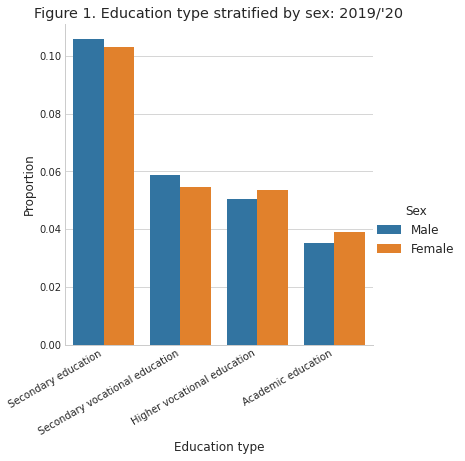

In [ ]:
g = sns.catplot(x = "Education type", y = "Proportion", hue = "Sex", data = df_jw[df_jw["Year"] == "2019/\'20"], 
                kind = "bar", ci = None).set(title = "Figure 1. Education type stratified by sex: 2019/\'20")
g.set_xticklabels(rotation = 30, ha = "right")
plt.show()

With regards to the distribution of education type for men and women over time, the reader is referred to figure two below. It becomes clear from the figure that the overall prevalence of the "secondary" education type has decreased slightly over the 2005-2020 period amongst both men and women. The previous finding that men are overrepresented relative to women for the lower education categories over the 2019-2020 period also holds for the broader 2005-2020 period, albeit only slightly. With regards to the "secondary vocational" education type a similar pattern can be observed as for the "secondary" education type. There is an overall slight decrease amongst the number of both men and women in this education category over the 2005-2020. Men are furthermore relatively heavily overrepresented in this education category. With regards to the two higher education categories, an inverse pattern can be observed. For both the "higher vocational" and "academic" education categories, there is a general increase in the frequency of individuals who are enrolled in the types of programs associated with these two categories. For both these education types, women are furthermore overrepresented relative to men, although this difference is starker for the "higher vocational" than the "academic" education type. As such, an interesting pattern can be observed where in the relative extremes of the education type variable there exist smaller differences between men and women, where this difference is larger for the middle categories of this variable. 



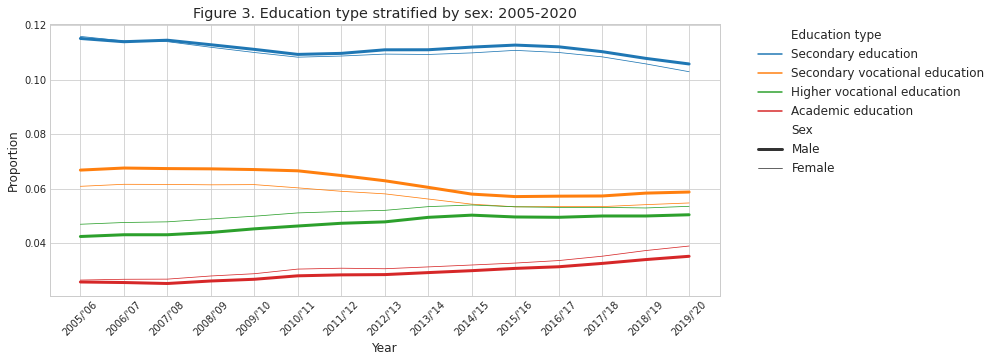

In [ ]:
g = sns.lineplot(x = "Year", y = "Proportion", hue = "Education type", size = "Sex", 
                  data = df_jw, ci = None)
g.set(title = "Figure 3. Education type stratified by sex: 2005-2020")
plt.setp(g.get_xticklabels(), rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

In order to provide an answer to the third question, the reader is referred to figure three below. Figure three shows the relative distribution of education type in the Netherlands stratified by Dutch, non-Dutch western, or non-Dutch non-western migration background over the 2019-2020 period. It becomes apparent from figure 3 that for the "secondary" education type, Dutch persons are most represented, followed by non-Dutch non-western persons and non-Dutch western persons. The difference in frequency is relatively small between the Dutch and the non-Dutch non-western population, but quite a bit larger for both relative to the share of the non-Dutch western population. A similar pattern holds in the "secondary vocational" category, with the exception that non-Dutch non-western persons are now more represented than Dutch persons. Within the higher education types non-Dutch western persons are the most frequent, where Dutch and non-Dutch non-western persons are about equal. More specifically, non-Dutch western individuals are relatively most represented in the "higher vocational" category, followed closely by Dutch and then non-Dutch non-western persons. Finally, in the "academic" category the non-Dutch western group is two times more frequent than their two respective counterparts, which are themselves equal in their relative representation in this category. 



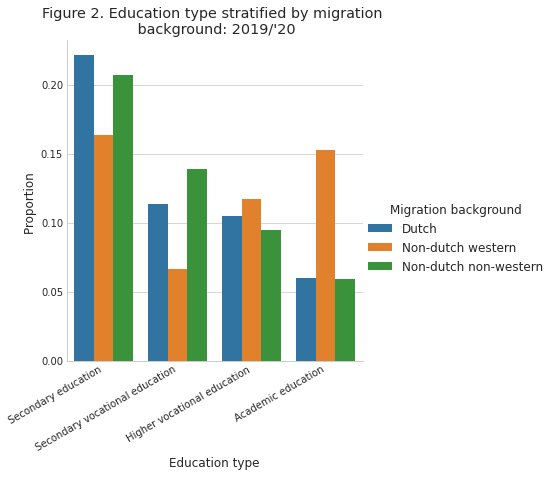

In [ ]:
g = sns.catplot(x = "Education type", y = "Proportion ", hue = "Migration background", 
                data = df_jw[(df_jw['Migration background'] != 'Non-dutch') & (df_jw['Year'] == "2019/\'20")], 
                kind = "bar", ci = None).set(title = "Figure 2. Education type stratified by migration \n background: 2019/\'20")
g.set_xticklabels(rotation = 30, ha = "right")
plt.show()

To provide an answer to the fourth and final question, the reader is referred to figure four below. Note that in order to improve plot comprehension, the non-Dutch western and non-Dutch non-western categories have been merged into a single non-Dutch category. Figure four first reaffirms the notion that more individuals overall have a lower as opposed to a higher education, but that the share of higher educated persons has been increasing over time where the share of lower educated persons has been decreasing. With respect to the relation between education type and migration background over time, it first becomes clear that a there is a considerable difference in the proportion of Dutch persons with a migration background as opposed to Dutch persons with no migration background in the "secondary" education type category. For the "secondary vocational" education category it becomes clear from the plot that although Dutch persons with a migration background historically were relatively overrepresented in this category, the differences between Dutch persons with and without a migration background have converged to be about equal for this category. With regards to the "higher vocational" educational category, there generally exists a negligible to no difference between Dutch persons with and without a migration background, although Dutch persons with a migration background were overrepresented for a few years in the 2010-2018 period. It finally becomes clear that over the 2005-2020 period there is a large divergence between Dutch persons with and without a migration background, with Dutch persons with a migration background having an inordinate share of the total. This can be explained by the earlier finding that Dutch persons with a western migration background are heavily overrepresented in this category. 

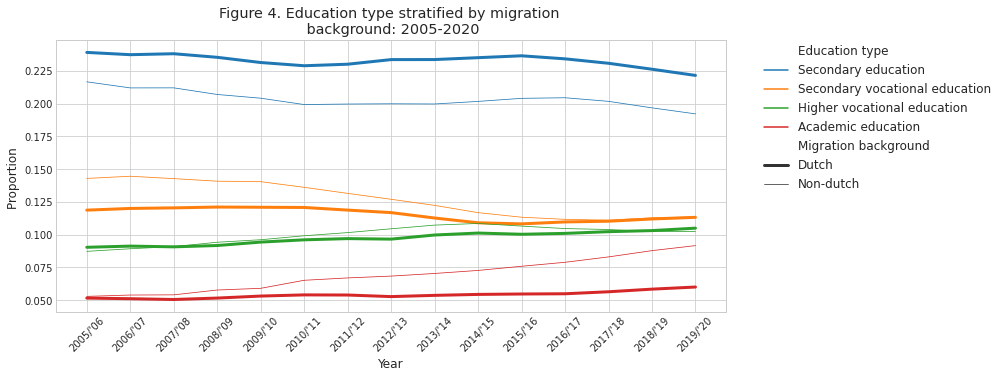

In [ ]:
g = sns.lineplot(x = "Year", y = "Proportion ", hue = "Education type", size = "Migration background",
                  data = df_jw[(df_jw['Migration background'] != 'Non-dutch western') & 
                            (df_jw['Migration background'] != 'Non-dutch non-western')], ci = None)
g.set(title = "Figure 4. Education type stratified by migration \n background: 2005-2020")
plt.setp(g.get_xticklabels(), rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

### Section 3.2: Investigating practical and theoretical educational differences between Dutch provinces.

This subsection posits the following question: in which provinces are the students _relatively_ on average more practically/profession oriented (Vmbo/Mbo), and in which provinces are the students _relatively_ more theoretically/academically oriented (Havo/Vwo & Hbo/Wo)?

To answer this, we set out to perform **correspondence analysis (CA)**. Correspondence analysis is a technique conceptually similar to principal components analysis "PCA" — an unsupervised machine learning dimension reduction technique — however in the case of CA using categorical variables rather than numerical variables. Correspondence analysis provides a visual means, namely via a "biplot", to uncover patterns or relationships between 2 or more categorical variables in a dataset. A biplot shows the data projected on the first two principal components (eigenvectors) and represents the data in lower (2D) dimensional space. Here we apply classical correspondence analysis with the 2 categorical variables in this dataset Education level and Province. 

In [ ]:
#baseline education categories dataset
df

Province,Groningen,Fryslân,Drenthe,Overijssel,Flevoland,Gelderland,Utrecht,Noord-Holland,Zuid-Holland,Zeeland,Noord-Brabant,Limburg
Education level,,,,,,,,,,,,
Vwo 3-6,4858,5530,4083,10296,3597,20773,17906,32120,37363,2944,24059,9196
Havo 3-5,4716,6299,4732,11851,4469,21132,13724,26947,33054,3744,23944,9073
Vmbo TL 3-4,3353,4722,3558,8808,3208,13867,7968,16385,22860,2517,17038,5838
Vmbo basis-kader 3-4,3150,4122,3426,7919,3072,11841,6260,12908,18561,2112,12615,5041
Praktijkonderwijs,1296,1281,1109,2217,1074,3646,1840,4249,6857,628,3381,1647
Vavo,425,469,450,1168,331,2198,1105,3060,3198,261,1895,978
Mbo bol,15211,18756,13279,30124,12331,46793,25090,52522,78250,7468,51195,21441
Mbo bbl,4648,5758,4617,11286,3832,17783,8663,18425,24442,3870,19430,6909
Hbo,21728,20136,10557,34220,10782,53623,35532,65597,92961,7093,70015,25249


In [ ]:
#perform correspondence analysis
ca = prince.CA()
ca.fit(df)

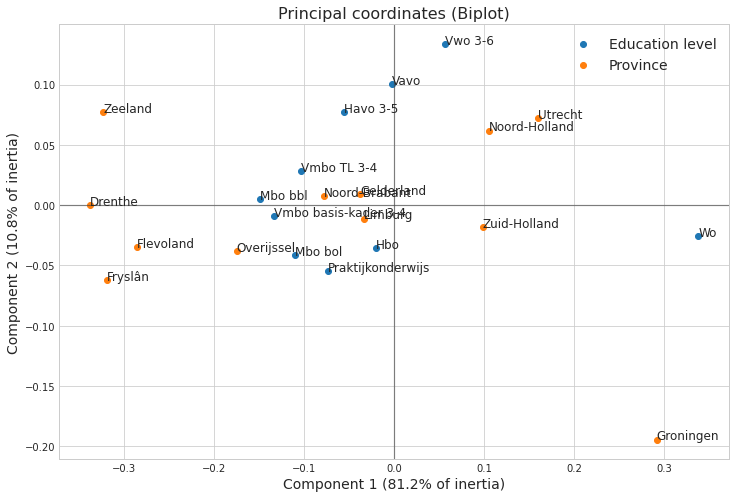

In [ ]:
#create biplot 
ax = ca.plot_coordinates(df, figsize=(12, 8))
ax.grid(b=None)
ax.set_xlabel(f"Component 1 ({ca.explained_inertia_[0]*100:.1f}% of inertia)", fontsize=14)
ax.set_ylabel(f"Component 2 ({ca.explained_inertia_[1]*100:.1f}% of inertia)", fontsize=14)
ax.set_title("Principal coordinates (Biplot)", fontsize=16)
ax.legend(fontsize=14)
plt.show()

92% of the variance is explained by the first two principal components, which is a substantial portion and means that most information is captured in just these 2 dimensions.  

In essence when interpreting a biplot, the farther the points are situated from the origin and the smaller the angle between 2 particular points if you were to draw them as vectors, the more likely it is that there is a positive association between these points. Conversely, if the labels are opposite and far away from each other, this
most likely indicates a negative relationship. Since correspondence analysis is all about relativities, a positive/negative relationship does not necessarily imply high/low absolute values (common misconception). For more about information about interpretation of CA biplots refer to sources: [<a href=https://www.displayr.com/how-correspondence-analysis-works/>1</a>,<a href=https://www.displayr.com/interpret-correspondence-analysis-plots-probably-isnt-way-think/>2</a>,<a href=https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3718710/>3</a>]

**Secondary educations (Mbo, Hbo & Wo)**  
We can see that Wo (university) is more on average for the provinces Groningen, Zuid-Holland, Noord-Holland and Utrecht. This makes sense given that the largest universities in the Netherlands are located in these provinces. For example: Erasmus and Leiden university (Zuid-Holland), VU, UVA Amsterdam (Noord-Holland), Utrecht University (Utrecht), RU (Groningen). One reason that may contribute to on average relatively more university students in these rightmost provinces compared to the universities in Noord-Brabant, Gelderland, Overijssel or Limburg, may be because of the prestigiousness/popularity associated with the universities located in the former provinces. Other possible factors include accessibility, cost of living in the city, ease of admittance, available degrees at the university (some are for example only technical universities) etc. In contrast, provinces Zeeland, Drenthe, Flevoland and Frieslan are almost completely opposite to Wo on the biplot, suggesting a negative relationship. This makes sense as these provinces in fact have no universities. The few students that do pursue Wo in these leftmost provinces are most likely commuting to universities outside the provinces they live in. Regarding Mbo, this seems to be more on average for the leftmost provinces, while Hbo is somewhere in the middle. Note though that since these are both closer to the origin than Wo an association with any particular province(s) is not as strong. This could be explained by the fact that there exist way more colleges for Hbo and Mbo than universities across the Netherlands.

**High school (Vmbo, Havo & Vwo)**  
The situation is slightly different for high schools since location becomes less of a limiting factor. There is an abundancy of high schools in the Netherlands (>1600) — even in rural areas — so the _relative_ distributions of education levels (Vmbo, Havo, Vwo) we expect to be roughly equal for all provinces. We can see however that Vwo is more on average for the provinces Utrecht and Noord-Holland. Vmbo appears to be more on average for the leftmost provinces.

### Section 3.3: Investigating educational distributions between Dutch provinces with geovisualization. 

We now take a look at implementing geovisualization to our dataset so we can have a more intuitive way to look at the way the student population is distributed in each province. By taking the same dataset as the one used for the CA analysis (excluding the "Vavo" category here due to it having a negligeable percentual overall contribution). We make the educational category comparison relative to the province, not the whole country. The percentual contributions are therefore with respect to the total student population of the categories we consider, per province. This essentially gives us the same result as the CA biplot analysis, only mapped onto the Dutch landscape. The geographic geometric data of each Dutch province used in this analysis can be found <a href="https://hub.arcgis.com/datasets/7036e28fb9f14a93bc3ab22c1c5aee14_0?geometry=-5.140%2C50.968%2C15.767%2C53.327">here</a>.



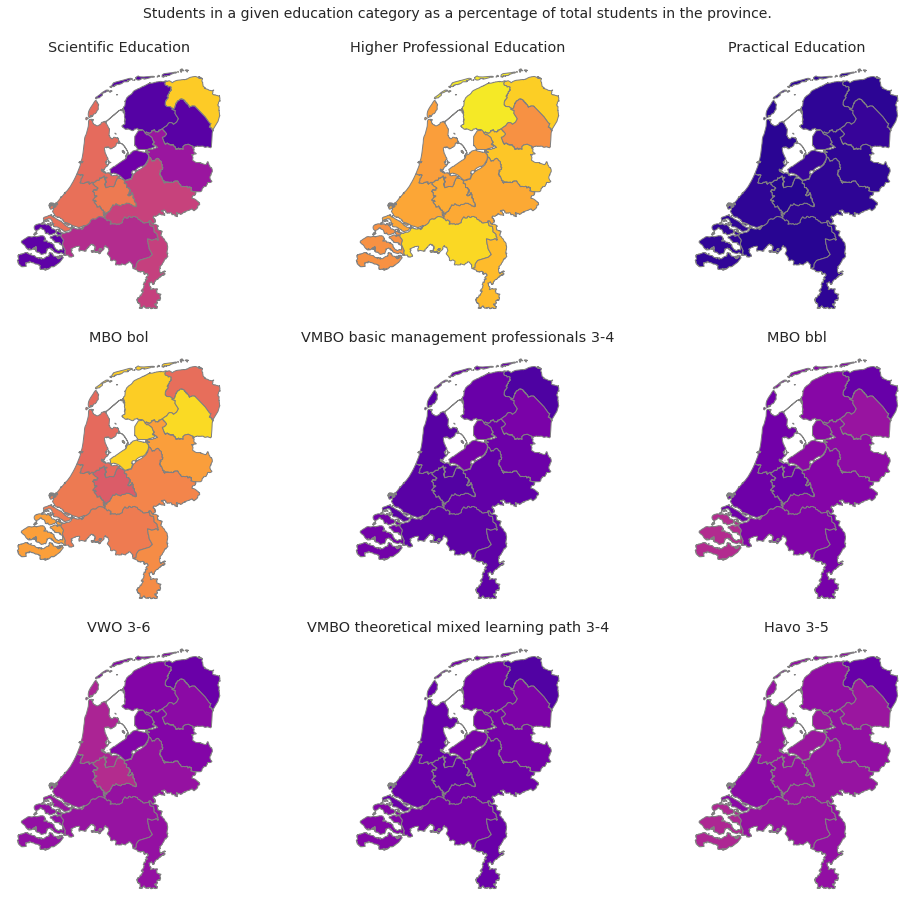

In [ ]:
colormap = "plasma"

#subplots (shared legend shown separately)
fig,axs = plt.subplots(3, 3,figsize = (14,14))
gdf_prov.plot(ax = axs[0, 0], edgecolor = 'gray', column = 'Scientific education', cmap = colormap, vmin = 0, vmax = 30); gdf_prov.plot(ax = axs[0, 1], edgecolor = 'gray', column = 'Higher professional education', cmap = colormap, vmin = 0, vmax = 30); gdf_prov.plot(ax = axs[0, 2], edgecolor = 'gray', column = 'Practical education', cmap = colormap, vmin = 0, vmax = 30); 
gdf_prov.plot(ax = axs[1, 0], edgecolor = 'gray', column = 'MBO bol', cmap = colormap, vmin = 0, vmax = 30); gdf_prov.plot(ax = axs[1, 1], edgecolor = 'gray', column = 'VMBO basic management professionals 3-4', cmap = colormap, vmin = 0, vmax = 30); gdf_prov.plot(ax = axs[1, 2], edgecolor = 'gray', column = 'MBO bbl', cmap = colormap, vmin = 0, vmax = 30); 
gdf_prov.plot(ax = axs[2, 0], edgecolor = 'gray', column = 'VWO 3-6', cmap = colormap, vmin = 0, vmax = 30); gdf_prov.plot(ax = axs[2, 1], edgecolor = 'gray', column = 'VMBO theoretical mixed learning path 3-4', cmap = colormap, vmin = 0, vmax = 30); gdf_prov.plot(ax = axs[2, 2], edgecolor = 'gray', column = 'Havo 3-5', cmap = colormap, vmin = 0, vmax = 30); 

#subplot label settings
axs[0,0].set_title('Scientific Education'); axs[0,0].axis('off'); axs[0,1].set_title('Higher Professional Education'); axs[0,1].axis('off'); axs[0,2].set_title('Practical Education'); axs[0,2].axis('off');
axs[1,0].set_title('MBO bol'); axs[1,0].axis('off'); axs[1,1].set_title('VMBO basic management professionals 3-4'); axs[1,1].axis('off'); axs[1,2].set_title('MBO bbl'); axs[1,2].axis('off');
axs[2,0].set_title('VWO 3-6'); axs[2,0].axis('off'); axs[2,1].set_title('VMBO theoretical mixed learning path 3-4'); axs[2,1].axis('off'); axs[2,2].set_title('Havo 3-5'); axs[2,2].axis('off');

#figure config
fig.suptitle("Students in a given education category as a percentage of total students in the province.", fontsize=14).set_y(0.90)
fig.tight_layout()

#shift subplots down:
fig.subplots_adjust(top=0.85)

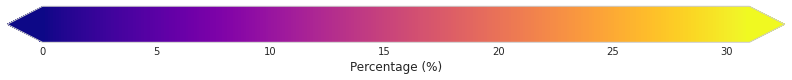

In [ ]:
#independent legend gradient (for practical reasons...) -- [geopandas is annoingly difficult when dealing with shared legends in the subplot environment]
fig = plt.figure() 
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', cmap=plt.get_cmap('plasma'),norm=mpl.colors.Normalize(0, 30),
                               extend='both', label='Percentage (%)', ticks=[0, 5, 10, 15, 20, 25, 30])

### Section 3.4: Geovisualization of average income and population density. 

After looking at the  distribution of the students in the different provinces of the Netherlands, we thought that it would be interesting to look at the difference in average household income and at the population density across the provinces of the Netherlands so we could get further insight. We chose these two parameters because they represent the average wealth and the environmental condition of the region (rural vs urban), both aspects that could significantly impact the choice of the students across the country. In order to perform this analysis, we use a dataset containing the population for each province (also from CBS). 

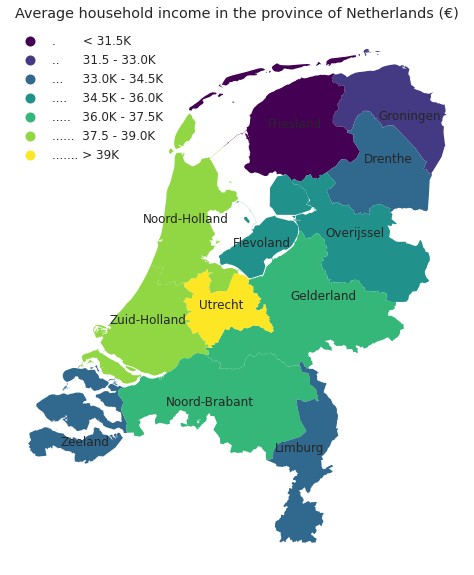

In [ ]:
#Libraries Setup

plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "DejaVu Sans",
    "font.serif": ["Palatino"]})

### INCOME

merged_data.plot(column="income_dis", figsize=(15, 10), legend = True, legend_kwds={'loc': 'upper left'}, cmap = "viridis")
merged_data['coords'] = merged_data['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_data['coords'] = [coords[0] for coords in merged_data['coords']]

for idx, row in merged_data.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],
                 horizontalalignment='center')

plt.title("Average household income in the province of Netherlands (€)")
plt.axis("off")
plt.show()


The figure above shows the average household income across the provinces of The Netherlands. We can see that the richest region is Utrecht and the regions of the central part of the country, that make up the Randstad. This comes as no surprise, and the differences in educational distribution for the core provinces of North Holland, South Holland and Utrecht are negligible between them. There are clear economic discrepancies as we move further away from the Randstad area and into the more rural outer provinces.

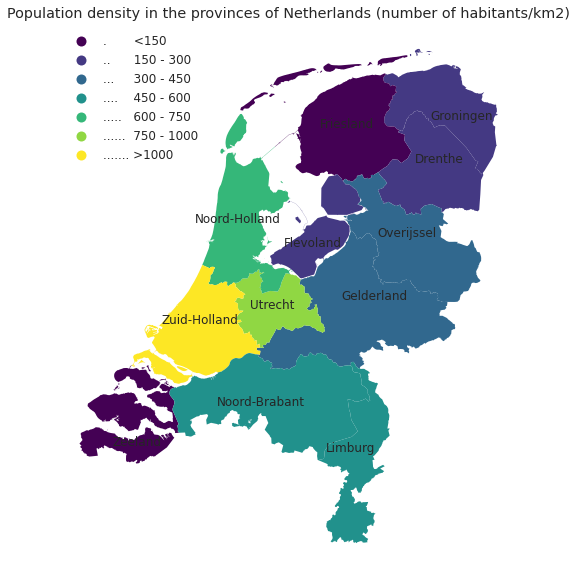

In [ ]:
### POPULATION

merged_data.plot(column="population_density_dis", figsize=(15, 10), legend = True, legend_kwds={'loc': 'upper left'}, cmap = "viridis")
merged_data['coords'] = merged_data['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_data['coords'] = [coords[0] for coords in merged_data['coords']]

for idx, row in merged_data.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],
                 horizontalalignment='center')

plt.title("Population density in the provinces of Netherlands (number of habitants/km2)")
plt.axis("off")
plt.show()

The figure above shows the population density in across the provinces of The Netherlands. We can see that the most populated region is Zuid-Holland and Utrecht is the second most populated. The difference in terms of income is noticeable between each province but it's not dramatically high and so, it probably does not have a significant impact on the distribution of the students in the different education type. This is probably more related with the concentration of educational institutions and the variety offered by higher population density provinces: population here would translate to a wider range of opportunities provided. For what concerns the population density, we thought particularly interesting that the region of Groningen shows a high percentage of student that choose the scientific education. We explain that because of the presence of the well-known Groningen University, one of the top 100 universities in the world, that attracts a substantial number of the students to their region.

## Section 4: Conclusions.
      

In conclusion, with respect to the first analysis, it first became clear that with regards to the marginal distribution of education type, more persons are lower as opposed to higher educated, although the size of the higher educated group has been increasing relative to the lower educated group over the last 15 years. With regards to relationship between education type and sex, the conclusion is twofold: First, more women than men are higher educated, where the difference between the two is higher in the "secondary vocational" and "vocational" education type categories than the "secondary" and "academic" categories. Second, the sex trend in education type over the past 15 years has remained relatively stable. With regards to relationship between education type and migration background, it can be concluded that Dutch persons with a western migration background are quite heavily overrepresented in the higher education categories and underrepresented in the lower education categories. The native Dutch and the Dutch with a non-western migration background are about evenly represented in all categories, with the native Dutch having a higher share in the "secondary" and "higher vocational" education categories, and the Dutch non-western persons having a higher share in the "secondary" vocational" category. These two groups are finally close to equal on the "academic" category. Finally, with regards to the development of education type stratified by migration background over the 2005-2015 period, the native Dutch have consistently been relatively overrepresented on the "secondary" education type. The share of Dutch persons with a migration background has decreased relative to the share of Dutch persons without a migration background over this period for the "secondary vocational" category, where the two groups have remained equal and relatively stable in their share for the "higher vocational" education category. With regards to the academic education over time, the share of the Dutch with a migration background has steadily diverged from that of the Dutch with no migration background, which is almost entirely due to the large number of Dutch with a western migration background within this category.

With respect to the second analysis, it can be concluded that the provinces Groningen, Zuid-Holland, Noord-Holland and Utrecht — relative to the other provinces — tend to, on average, have students in the Vwo & Wo categories. In other words, relatively more theoretically/academically oriented students. Vmbo & Mbo seem to, on average, align more with the provinces of Zeeland, Drenthe, Flevoland and Fryslan. That is, relatively more practical and profession oriented students. The raw data seems to support this. We can also see this when the data is mapped onto the Dutch province landscape, where the prevalent education category throughout the whole of the Netherlands is Higher Professional Education, with a notable high percentage of scientific oriented students in the province of Groningen.

Finally, the geomaps helped to geographically visualize the distribution of the students across the country. The Randstad, composed of the provinces of Zuid-Holland, Noord-Holland and Utrecht is the area of the country with the highest population density and, generally, with the highest household income. Across these core provinces, no difference in the distribution on the education of the students in the education types has been observed. However, when compared to the other provinces, the level of students in the scientific education is consistently higher. An evidence of this result is that most of the Dutch universities are located in these core provinces (3 in Zuid-Holland, 2 in Noord-Holland and 1 in Utrecht). An exception is represented by the province of Groningen where the proportion of students in the scientific education is the highest of the country even when looking at its lower population density and average household income. This was explained by the presence of the high-ranking "University of Groningen" that attracts many students of the country and the likely absence of other educational institutions to cover other categories.

Furthermore, some questions to explore after the CA analysis are: Which factors influence these discrepancies between provinces? Are some schools for example less or more stringent when it comes to admittance? Are students in the leftmost provinces maybe purposefully choosing not to pursue higher education, even if they were intellectually capable of doing so? Maybe the students in these provinces cannot afford to live in a university city or do not want to do long commutes every day, and instead as a result after high school settle for an Mbo or Hbo degree they can obtain close to home. Additional socioeconomic factors that influence these observed discrepancies should be explored.

Reports corroborating some of the findings of the second analysis:  
https://www.omroepzeeland.nl/nieuws/108666/Weinig-Zeeuwse-scholieren-op-het-vwo  
https://www.fsp.nl/wp-content/uploads/2018/12/Redenen-waarom-Friese-jongeren-lager-zijn-opgeleid.pdf  

The second article mentions 4 factors why young kids from Friesland are lower educated compared to the rest of NL: Parents have lower education, School advice is lower, Distance to school (3.1km on average for Vmbo school, 5.1km for Havo/Vwo school), Parents' lower ambition which in turn also affects the school advice a child is given when the child embarks high school.



## Section 5: References.

#### Subsection 3.1 (By order of appearance):
- CBS, 2021. https://www.cbs.nl/en-gb/over-ons/organisation.
- NJI, 2019. https://www.nji.nl/nl/Databank/Cijfers-over-Jeugd-en-Opvoeding/Cijfers-per-onderwerp-Onderwijsachterstanden.
- CBS, 2020. https://opendata.cbs.nl/portal.html?_la=nl&_catalog=CBS&tableId=71450ned&_theme=333%2F.